# Analyze meta teacher

In [1]:
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from lift.environments.gym_envs import NpGymEnv
from lift.environments.teacher_envs import TeacherEnv, ConditionedTeacher
from lift.environments.rollout import rollout

from lift.teacher import load_teacher
from configs import BaseConfig

In [2]:
config = BaseConfig()

# teacher = load_teacher(config, meta=True, filename="teacher_meta_noise_only_silu.pt")
# teacher = load_teacher(config, meta=True, filename="teacher_meta_slope_only_silu.pt")
teacher = load_teacher(config, meta=True, filename="teacher_meta_noise_only_-0.2_1.2.pt")
basic_teacher = load_teacher(config, filename="teacher_silu.pt")


MetaSAC teacher loaded

SAC teacher loaded


In [3]:
# rollout conditioned teacher

# get normal teacher predictions for each obs


# calculate missalignment

## Eval rollout

In [5]:
# generate traj
def eval_teacher_rollout(
    teacher, 
    env_noise, 
    env_noise_slope, 
    teacher_noise, 
    teacher_noise_slope, 
    n_steps=3000,
):
    env = NpGymEnv("FetchReachDense-v2", max_episode_steps=100)
    env = TeacherEnv(
        env, 
        noise_range=[env_noise, env_noise], 
        noise_slope_range=[env_noise_slope, env_noise_slope], 
        append_obs=False,
    )

    conditioned_teacher = ConditionedTeacher(
        teacher, 
        noise_range=[teacher_noise, teacher_noise], 
        noise_slope_range=[teacher_noise_slope, teacher_noise_slope], 
        alpha_range=[1., 1.],
    )
    conditioned_teacher.reset()

    print(conditioned_teacher.noise, conditioned_teacher.noise_slope)
    
    data = rollout(
        env,
        conditioned_teacher,
        n_steps=n_steps,
        sample_mean=True,
        terminate_on_done=False,
        reset_on_done=True,
        random_pertube_prob=0.,
        action_noise=0.,
    )
    return data

In [8]:
# eval teacher with different meta variables in the same environment
np.random.seed(0)

env_noise = 0.
env_noise_slope = 0.

num_rows = 8
num_cols = 8
teacher_noises = torch.linspace(0., 1., steps=num_rows)
# teacher_noises = torch.linspace(0., 0., steps=num_rows)
# teacher_noise_slopes = torch.linspace(0., 1., steps=num_cols)
teacher_noise_slopes = torch.linspace(0., 0., steps=num_cols)

eval_data_1 = [[None for _ in range(num_cols)] for _ in range(num_rows)]
for i, teacher_noise in enumerate(teacher_noises):
    for j, teacher_noise_slope in enumerate(teacher_noise_slopes):
        eval_data_1[i][j] = eval_teacher_rollout(
            teacher,
            env_noise, 
            env_noise_slope,
            teacher_noise,
            teacher_noise_slope,
        )
    #     break
    # break

[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 964.08item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 957.02item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1007.11item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1031.81item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1002.66item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1018.00item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1003.05item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 990.30item/s] 


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 982.24item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 997.35item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1009.64item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1003.96item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1007.95item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1030.89item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1012.58item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1009.65item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 972.50item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1004.90item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1009.62item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1003.13item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1034.13item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1030.73item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1027.65item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 990.80item/s] 


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 982.62item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 951.79item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1009.55item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1002.43item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1007.16item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1005.15item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1028.67item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1023.42item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1020.82item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1021.29item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 984.57item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1012.55item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1002.08item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1021.29item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1015.89item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1017.41item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1031.80item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1025.24item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1028.03item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1007.45item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1008.48item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1028.22item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1017.75item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 997.56item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1017.28item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1024.84item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1018.34item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1011.25item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1015.14item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1004.51item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1016.92item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1014.49item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1021.37item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 959.59item/s] 


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1009.93item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 991.45item/s] 


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 942.55item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 985.31item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 998.14item/s] 


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1014.74item/s]


In [9]:
# eval teacher with different meta variables in the same environment
np.random.seed(0)

env_noise = 1.
env_noise_slope = 1.

num_rows = 8
num_cols = 8
teacher_noises = torch.linspace(0., 1., steps=num_rows)
# teacher_noises = torch.linspace(0., 0., steps=num_rows)
# teacher_noise_slopes = torch.linspace(0., 1., steps=num_cols)
teacher_noise_slopes = torch.linspace(0., 0., steps=num_cols)

eval_data_2 = [[None for _ in range(num_cols)] for _ in range(num_rows)]
for i, teacher_noise in enumerate(teacher_noises):
    for j, teacher_noise_slope in enumerate(teacher_noise_slopes):
        eval_data_2[i][j] = eval_teacher_rollout(
            teacher,
            env_noise, 
            env_noise_slope,
            teacher_noise,
            teacher_noise_slope,
        )

[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 989.44item/s] 


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1021.60item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 981.44item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 993.69item/s] 


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1018.61item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1011.21item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1013.65item/s]


[0.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1025.08item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1004.88item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1017.80item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 955.99item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1005.13item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 992.65item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1005.46item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 977.00item/s]


[0.14285715] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1003.65item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 999.94item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1011.73item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1001.00item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1011.57item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 998.36item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 997.81item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 991.36item/s]


[0.2857143] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 995.06item/s] 


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1015.98item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1011.46item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1011.93item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1031.08item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1000.53item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 996.50item/s] 


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1008.19item/s]


[0.42857146] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1006.78item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 995.72item/s] 


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 997.47item/s] 


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1011.47item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1007.75item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1002.11item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 992.58item/s] 


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1001.97item/s]


[0.57142854] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 997.36item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1000.44item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 997.32item/s] 


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 988.60item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1000.20item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1002.26item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 981.14item/s] 


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1016.75item/s]


[0.71428573] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1001.55item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 996.22item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1000.49item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:02<00:00, 1005.87item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 997.27item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 981.28item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 966.57item/s]


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 973.73item/s] 


[0.85714287] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 975.89item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 988.93item/s] 


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 989.21item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 913.54item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 985.82item/s] 


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 987.68item/s] 


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 974.70item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 981.14item/s]


[1.] [0.]


Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 989.35item/s]


In [10]:
# compute aggregate stats
def compute_stats(eval_data, func):
    num_rows = len(eval_data)
    num_cols = len(eval_data[0])
    return np.array([[func(eval_data[i][j]) for j in range(num_cols)] for i in range(num_rows)])

def compute_mean_reward(data):
    return data["rwd"].mean()

def compute_cum_reward(data):
    return data["rwd"].sum() / data["done"].sum()

def compute_reward_std(data):
    return data["rwd"].std()

def compute_eps_len(data):
    return len(data["done"]) / data["done"].sum()

def compute_act_abs(data):
    return np.abs(data["act"]).mean()

def compute_act_mean(data):
    return data["act"].mean()

def compute_act_std(data):
    return data["act"].std()

In [11]:
eval_rwd_mean_1 = compute_stats(eval_data_1, compute_mean_reward)
eval_rwd_std_1 = compute_stats(eval_data_1, compute_reward_std)
eval_act_mean_1 = compute_stats(eval_data_1, compute_act_mean)
eval_act_std_1 = compute_stats(eval_data_1, compute_act_std)
eval_act_abs_1 = compute_stats(eval_data_1, compute_act_abs)

eval_rwd_mean_2 = compute_stats(eval_data_2, compute_mean_reward)
eval_rwd_std_2 = compute_stats(eval_data_2, compute_reward_std)
eval_act_mean_2 = compute_stats(eval_data_2, compute_act_mean)
eval_act_std_2 = compute_stats(eval_data_2, compute_act_std)
eval_act_abs_2 = compute_stats(eval_data_2, compute_act_abs)

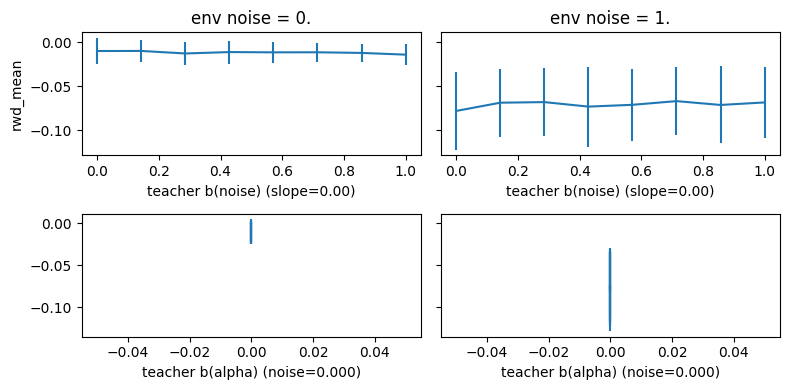

In [12]:
# compare reward
fig, ax = plt.subplots(2, 2, figsize=(8, 4), sharey="row")

alpha_ref_idx = 0
noise_ref_idx = 0

ax[0,0].errorbar(
    teacher_noises, 
    eval_rwd_mean_1[:,alpha_ref_idx].flatten(), 
    yerr=eval_rwd_std_1[:,alpha_ref_idx].flatten()
)

ax[0,1].errorbar(
    teacher_noises, 
    eval_rwd_mean_2[:,alpha_ref_idx].flatten(), 
    yerr=eval_rwd_std_2[:,alpha_ref_idx].flatten()
)

ax[1,0].errorbar(
    teacher_noise_slopes, 
    eval_rwd_mean_1[noise_ref_idx,:].flatten(), 
    yerr=eval_rwd_std_1[noise_ref_idx,:].flatten()
)

ax[1,1].errorbar(
    teacher_noise_slopes, 
    eval_rwd_mean_2[noise_ref_idx,:].flatten(), 
    yerr=eval_rwd_std_2[noise_ref_idx,:].flatten()
)

ax[0,0].set_xlabel(f"teacher b(noise) (slope={teacher_noise_slopes[alpha_ref_idx]:.2f})")
ax[0,0].set_ylabel("rwd_mean")
ax[0,0].set_title("env noise = 0.")

ax[0,1].set_xlabel(f"teacher b(noise) (slope={teacher_noise_slopes[alpha_ref_idx]:.2f})")
ax[0,1].set_title("env noise = 1.")

ax[1,0].set_xlabel(f"teacher b(alpha) (noise={teacher_noises[noise_ref_idx]:.3f})")
ax[1,1].set_xlabel(f"teacher b(alpha) (noise={teacher_noises[noise_ref_idx]:.3f})")

plt.tight_layout()
plt.show()

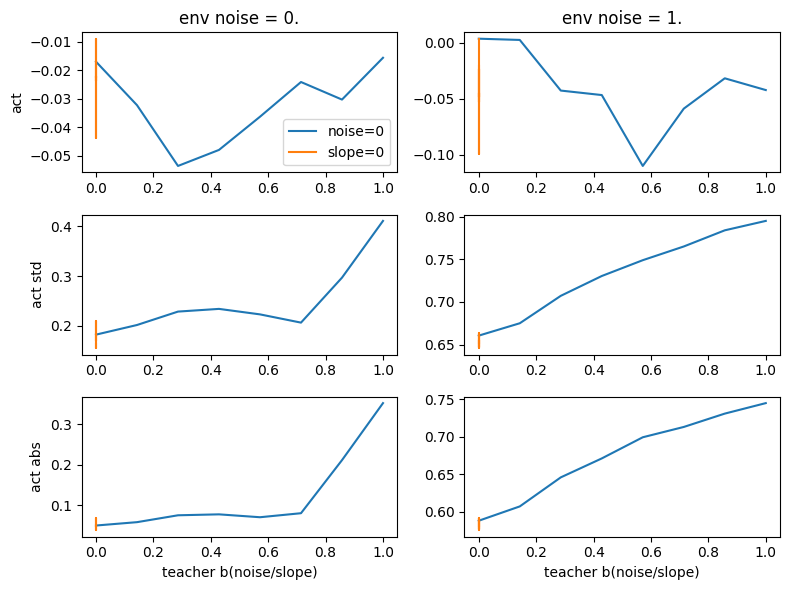

In [13]:
# compare actions
fig, ax = plt.subplots(3, 2, figsize=(8, 6), sharex="row")
ax[0, 0].plot(teacher_noises, eval_act_mean_1[:,0].flatten(), label="noise=0")
ax[0, 0].plot(teacher_noise_slopes, eval_act_mean_1[0,:].flatten(), label="slope=0")

ax[0, 1].plot(teacher_noises, eval_act_mean_2[:,0].flatten(), label="alpha=0")
ax[0, 1].plot(teacher_noise_slopes, eval_act_mean_2[0,:].flatten(), label="noise=0")

ax[1, 0].plot(teacher_noises, eval_act_std_1[:,0].flatten(), label="alpha=0")
ax[1, 0].plot(teacher_noise_slopes, eval_act_std_1[0,:].flatten(), label="noise=0")

ax[1, 1].plot(teacher_noises, eval_act_std_2[:,0].flatten(), label="alpha=0")
ax[1, 1].plot(teacher_noise_slopes, eval_act_std_2[0,:].flatten(), label="noise=0")

ax[2, 0].plot(teacher_noises, eval_act_abs_1[:,0].flatten(), label="alpha=0")
ax[2, 0].plot(teacher_noise_slopes, eval_act_abs_1[0,:].flatten(), label="noise=0")

ax[2, 1].plot(teacher_noises, eval_act_abs_2[:,0].flatten(), label="alpha=0")
ax[2, 1].plot(teacher_noise_slopes, eval_act_abs_2[0,:].flatten(), label="noise=0")

ax[0, 0].set_title("env noise = 0.")
ax[0, 1].set_title("env noise = 1.")

ax[-1, 0].set_xlabel("teacher b(noise/slope)")
ax[-1, 1].set_xlabel("teacher b(noise/slope)")

ax[0, 0].set_ylabel("act")
ax[1, 0].set_ylabel("act std")
ax[2, 0].set_ylabel("act abs")
ax[0, 0].legend()
plt.tight_layout()
plt.show()

In [15]:
def plot_heat_map(eval_stats, ax, xlabel, ylabel):
    df = pd.DataFrame(
        eval_stats, 
        index=[round(i, 2) for i in teacher_noises.tolist()], 
        columns=[round(i, 2) for i in teacher_noise_slopes.tolist()], 
    )
    sns.heatmap(df, annot=True, cbar=False, fmt=".2f", cmap="Blues", ax=ax)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

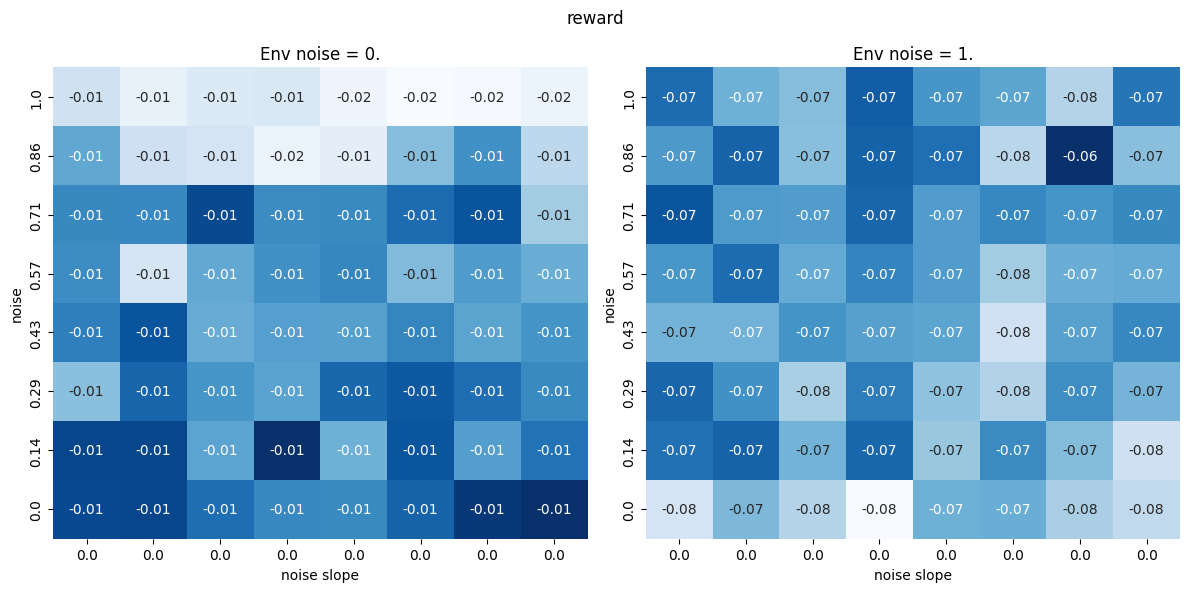

In [16]:
# plot reward
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_heat_map(eval_rwd_mean_1, ax[0], "noise slope", "noise")
plot_heat_map(eval_rwd_mean_2, ax[1], "noise slope", "noise")
ax[0].set_title("Env noise = 0.")
ax[1].set_title("Env noise = 1.")
plt.suptitle("reward")
plt.tight_layout()
plt.show()

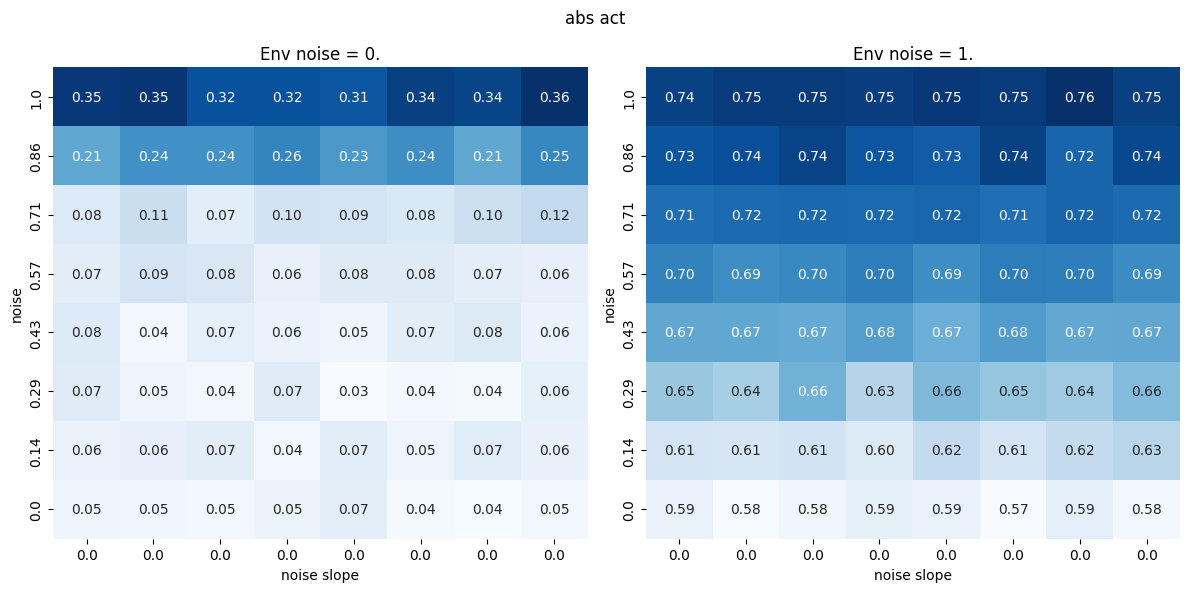

In [17]:
# plot action abs
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_heat_map(eval_act_abs_1, ax[0], "noise slope", "noise")
plot_heat_map(eval_act_abs_2, ax[1], "noise slope", "noise")
ax[0].set_title("Env noise = 0.")
ax[1].set_title("Env noise = 1.")
plt.suptitle("abs act")
plt.tight_layout()
plt.show()

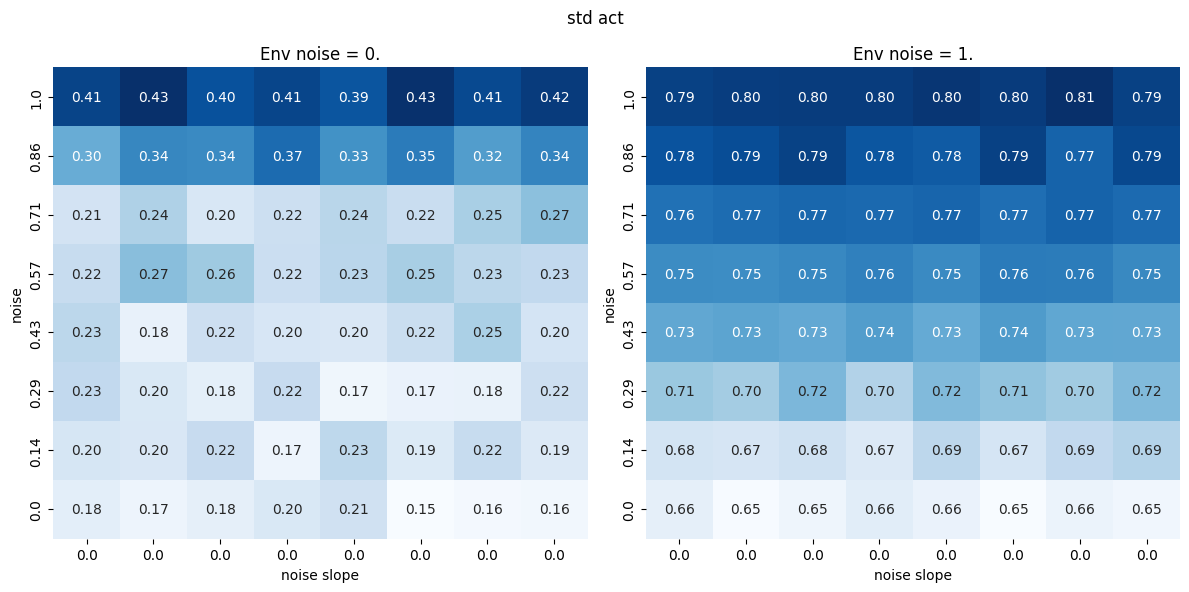

In [18]:
# plot action abs
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_heat_map(eval_act_std_1, ax[0], "noise slope", "noise")
plot_heat_map(eval_act_std_2, ax[1], "noise slope", "noise")
ax[0].set_title("Env noise = 0.")
ax[1].set_title("Env noise = 1.")
plt.suptitle("std act")
plt.tight_layout()
plt.show()

In [19]:
from tensordict import TensorDict

missalignment_mae_1 = np.zeros((len(eval_data_1), len(eval_data_1[0])))
meta_mae_1 = np.zeros((len(eval_data_1), len(eval_data_1[0])))
basic_teacher_act_abs_1 = np.zeros((len(eval_data_1), len(eval_data_1[0])))

for i in range(len(eval_data_1)):
    for j in range(len(eval_data_1[0])):
        e_data = eval_data_1[i][j]
        o = torch.tensor(e_data['obs']['observation'], dtype=torch.float32)
        b_act = basic_teacher.sample_action(TensorDict({"observation": o}), sample_mean=True)
        
        conditioned_teacher = ConditionedTeacher(
            teacher, 
            noise_range=[teacher_noises[i], teacher_noises[i]], 
            noise_slope_range=[teacher_noise_slopes[j], teacher_noise_slopes[j]], 
            alpha_range=[1., 1.],
        )
        conditioned_teacher.reset()
        m_act = conditioned_teacher.sample_action({"observation": e_data['obs']['observation']}, sample_mean=True)

        mae = np.abs(b_act - e_data['act']).mean()
        missalignment_mae_1[i,j] = mae
        meta_mae_1[i,j] = np.abs(m_act - e_data['act']).mean()
        basic_teacher_act_abs_1[i,j] = np.abs(b_act).mean()


missalignment_mae_2 = np.zeros((len(eval_data_2), len(eval_data_2[0])))
meta_mae_2 = np.zeros((len(eval_data_2), len(eval_data_2[0])))
basic_teacher_act_abs_2 = np.zeros((len(eval_data_2), len(eval_data_2[0])))

for i in range(len(eval_data_2)):
    for j in range(len(eval_data_2[0])):
        e_data = eval_data_2[i][j]
        o = torch.tensor(e_data['obs']['observation'], dtype=torch.float32)
        b_act = basic_teacher.sample_action(TensorDict({"observation": o}), sample_mean=True)

        conditioned_teacher = ConditionedTeacher(
            teacher, 
            noise_range=[teacher_noises[i], teacher_noises[i]], 
            noise_slope_range=[teacher_noise_slopes[j], teacher_noise_slopes[j]], 
            alpha_range=[1., 1.],
        )
        conditioned_teacher.reset()
        m_act = conditioned_teacher.sample_action({"observation": e_data['obs']['observation']}, sample_mean=True)

        mae = np.abs(b_act - e_data['act']).mean()
        missalignment_mae_2[i,j] = mae
        meta_mae_2[i,j] = np.abs(m_act - e_data['act']).mean()
        basic_teacher_act_abs_2[i,j] = np.abs(b_act).mean()

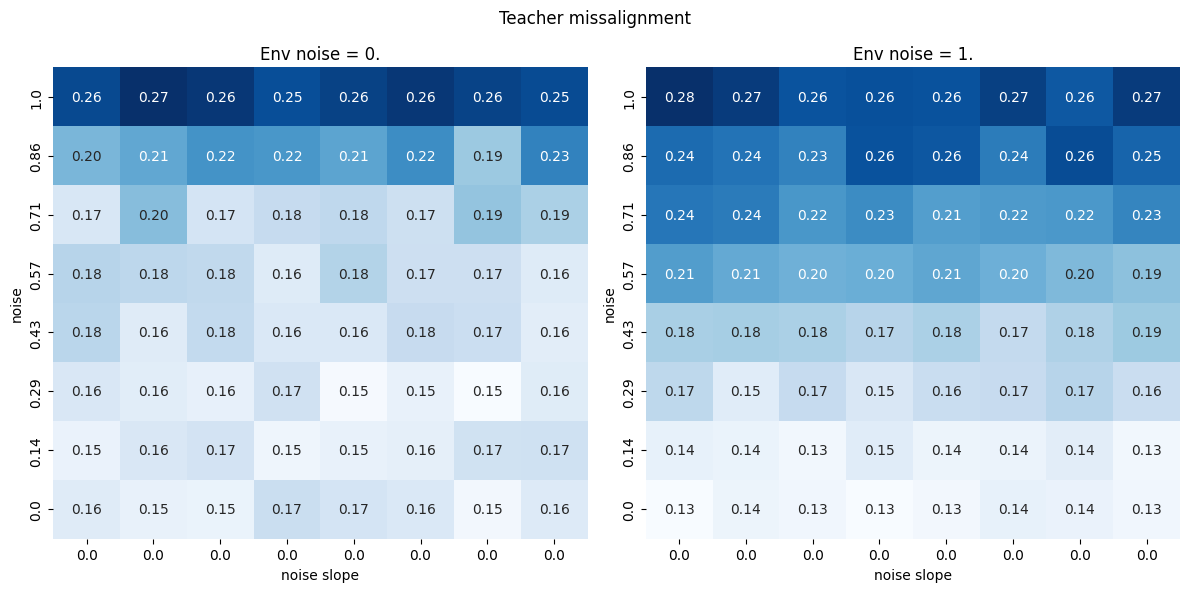

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_heat_map(missalignment_mae_1, ax[0], "noise slope", "noise")
plot_heat_map(missalignment_mae_2, ax[1], "noise slope", "noise")
ax[0].set_title("Env noise = 0.")
ax[1].set_title("Env noise = 1.")
plt.suptitle("Teacher missalignment")
plt.tight_layout()
plt.show()

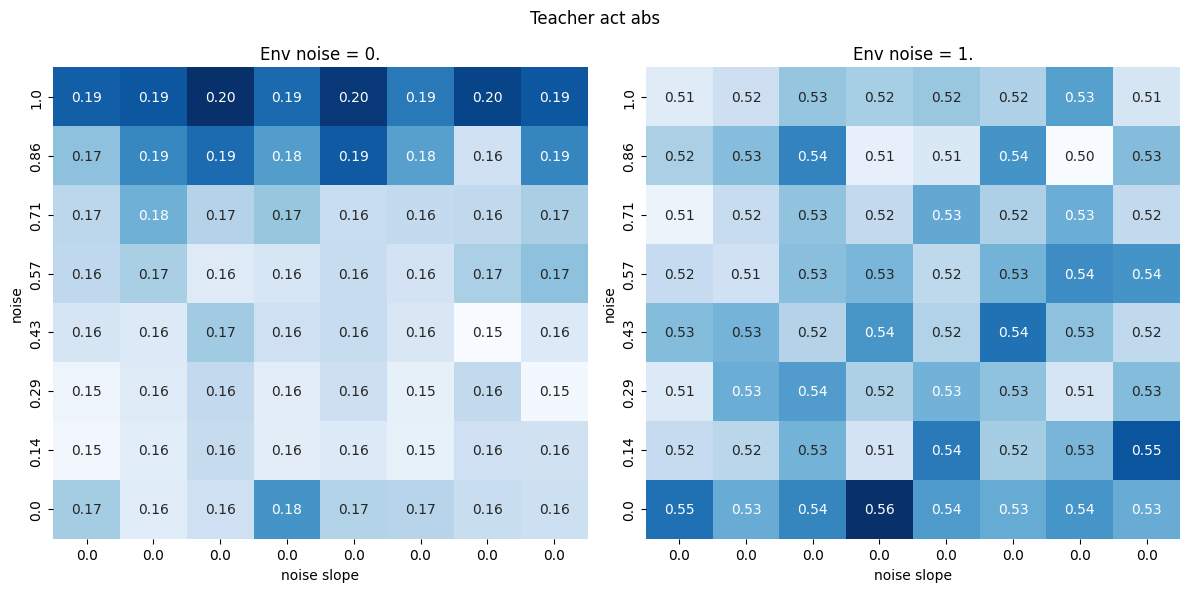

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_heat_map(basic_teacher_act_abs_1, ax[0], "noise slope", "noise")
plot_heat_map(basic_teacher_act_abs_2, ax[1], "noise slope", "noise")
ax[0].set_title("Env noise = 0.")
ax[1].set_title("Env noise = 1.")
plt.suptitle("Teacher act abs")
plt.tight_layout()
plt.show()

## Eval batch

In [40]:
def eval_teacher_batch(obs, teacher, teacher_noise, teacher_noise_slope, teacher_alpha):
    """Compute policy std on rollout obs"""
    conditioned_teacher = ConditionedTeacher(
        teacher, 
        noise_range=[teacher_noise, teacher_noise], 
        noise_slope_range=[teacher_noise_slope, teacher_noise_slope], 
        alpha_range=[teacher_alpha, teacher_alpha],
        alpha_apply_range=[0., 3.],
    )
    conditioned_teacher.reset()

    dist = conditioned_teacher.get_action_dist(obs)
    return dist.scale

In [41]:
env_noise = 0.5
env_noise_slope = 0.
teacher_noise = 0.
teacher_noise_slope = 0.
teacher_alpha = 1.

eval_rollout = eval_teacher_rollout(
    teacher,
    env_noise, 
    env_noise_slope,
    teacher_noise,
    teacher_noise_slope,
)

Rollout: 100%|██████████| 3000/3000 [00:03<00:00, 994.67item/s] 


In [42]:
# batch eval
teacher_alpha = 1.

num_rows = 8
num_cols = 8
teacher_noises = torch.linspace(0., 1., steps=num_rows)
teacher_noise_slopes = torch.linspace(0., 1., steps=num_cols)

eval_batch_1 = [[None for _ in range(num_cols)] for _ in range(num_rows)]
for i, teacher_noise in enumerate(teacher_noises):
    for j, teacher_noise_slope in enumerate(teacher_noise_slopes):
        eval_batch_1[i][j] = eval_teacher_batch(
            eval_rollout["obs"],
            teacher,
            teacher_noise,
            teacher_noise_slope,
            teacher_alpha,
        )

In [43]:
# batch eval
teacher_alpha = 3.

num_rows = 8
num_cols = 8
teacher_noises = torch.linspace(0., 1., steps=num_rows)
teacher_noise_slopes = torch.linspace(0., 1., steps=num_cols)

eval_batch_2 = [[None for _ in range(num_cols)] for _ in range(num_rows)]
for i, teacher_noise in enumerate(teacher_noises):
    for j, teacher_noise_slope in enumerate(teacher_noise_slopes):
        eval_batch_2[i][j] = eval_teacher_batch(
            eval_rollout["obs"],
            teacher,
            teacher_noise,
            teacher_noise_slope,
            teacher_alpha,
        )

In [44]:
def compute_mean_scale(data):
    return data.mean().data.item()

eval_scale_mean_1 = compute_stats(eval_batch_1, compute_mean_scale)
eval_scale_mean_2 = compute_stats(eval_batch_2, compute_mean_scale)

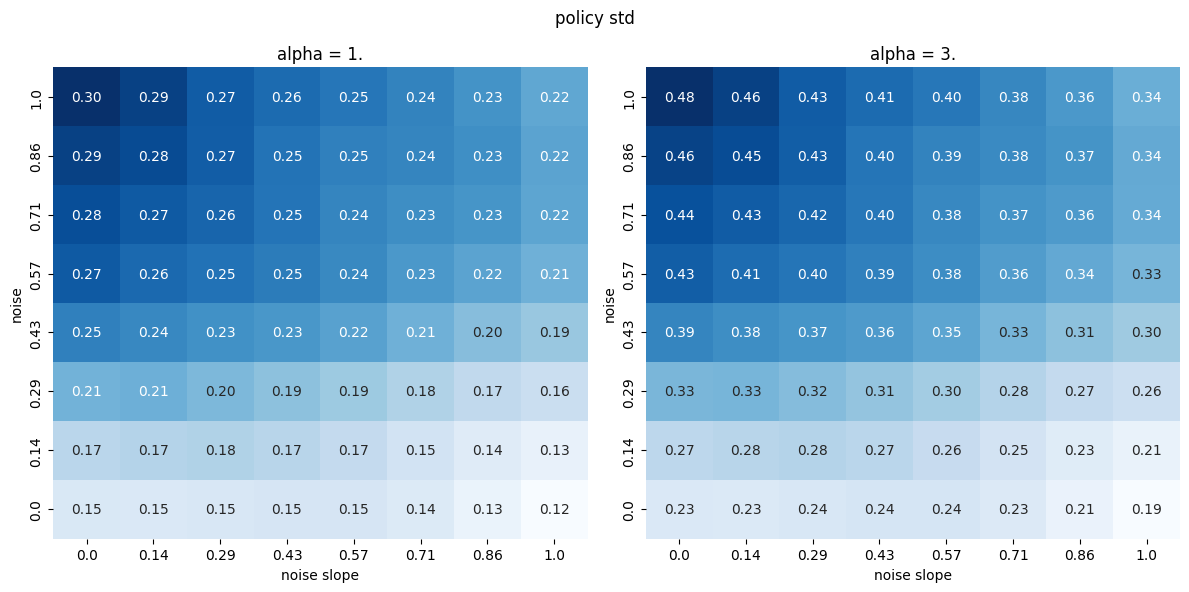

In [45]:
# plot policy std
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_heat_map(eval_scale_mean_1, ax[0], "noise slope", "noise")
plot_heat_map(eval_scale_mean_2, ax[1], "noise slope", "noise")
ax[0].set_title("alpha = 1.")
ax[1].set_title("alpha = 3.")
plt.suptitle("policy std")
plt.tight_layout()
plt.show()

## Deprecate

In [32]:
# umap state distributions
def normalize(x, mu, std):
    return (x - mu) / std

state_dim = 10 # robot pose, exclude goal pose
eval_states_1 = np.vstack([eval_data_1[i][0]["obs"]["observation"][..., :state_dim] for i in range(len(eval_data_1))])
eval_states_2 = np.vstack([eval_data_2[i][0]["obs"]["observation"][..., :state_dim] for i in range(len(eval_data_2))])
eval_state_labels_1 = np.vstack([np.ones_like(eval_data_1[i][0]["obs"]["observation"][..., :1]) * float(teacher_noises[i]) for i in range(len(eval_data_1))])
eval_state_labels_2 = np.vstack([np.ones_like(eval_data_2[i][0]["obs"]["observation"][..., :1]) * float(teacher_noises[i]) for i in range(len(eval_data_2))])

eval_states = np.vstack([eval_states_1, eval_states_2])

eval_states_norm = normalize(
    eval_states,
    eval_states.mean(0),
    eval_states.std(0),
)

print("eval state size", eval_states_norm.shape)

eval state size (60000, 10)


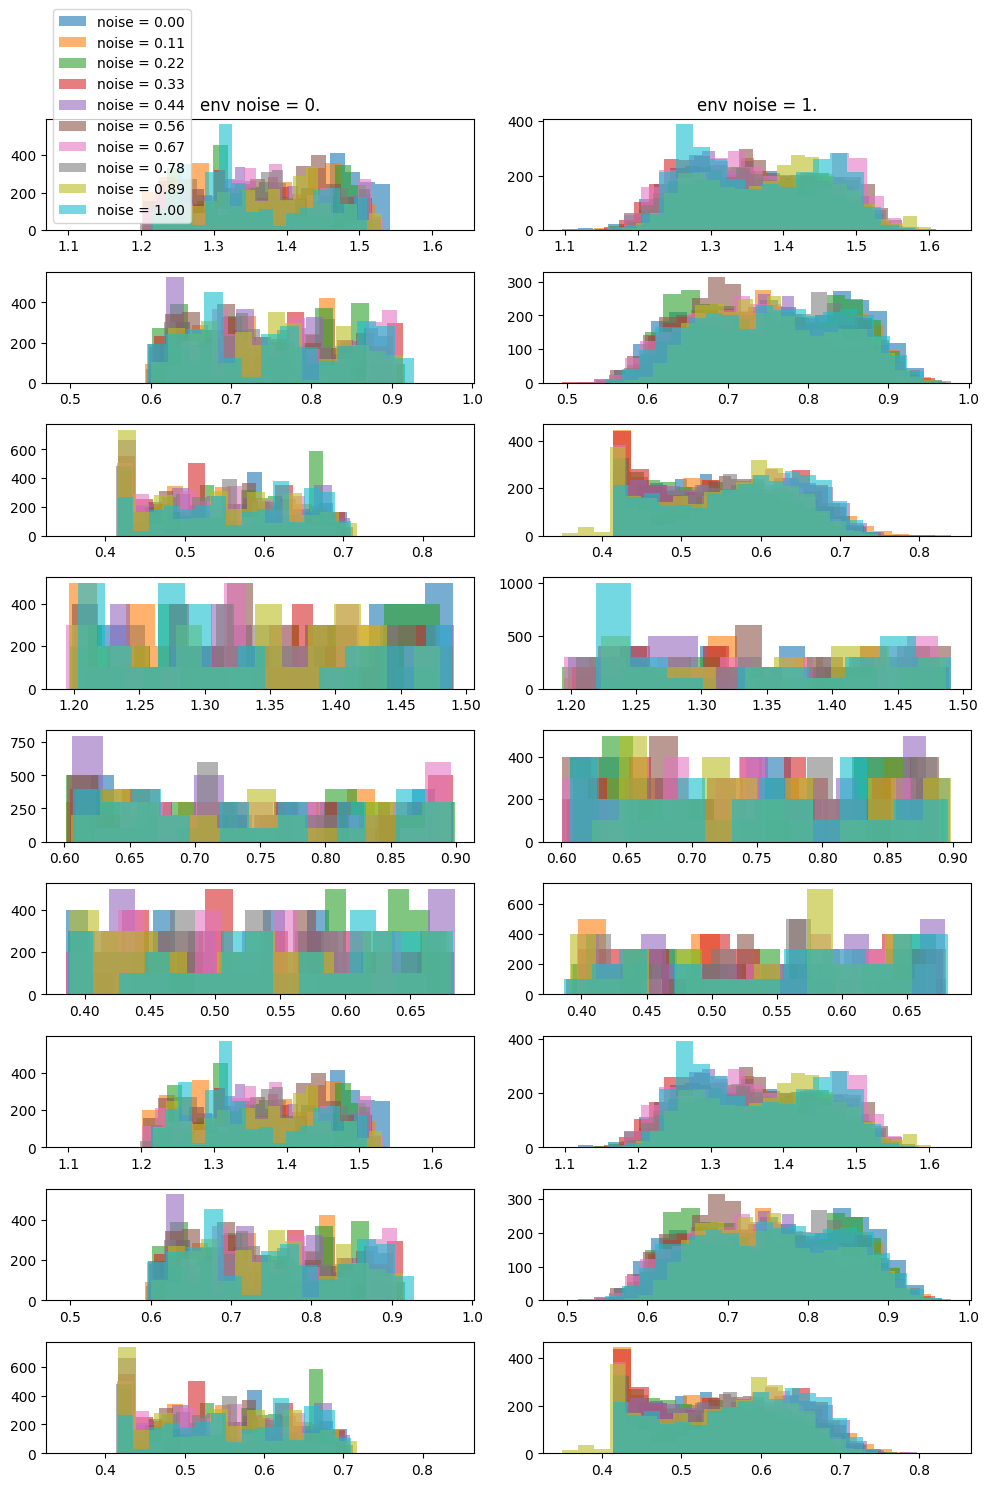

In [36]:
# plot state feature distributions
state_idxs = np.arange(state_dim - 1)
fig, ax = plt.subplots(len(state_idxs), 2, figsize=(10, 15), sharex="row")
for i, s in enumerate(state_idxs):
    for j in range(len(teacher_noises)):
        ax[i, 0].hist(eval_data_1[j][0]["obs"]["observation"][:, i], bins="fd", alpha=0.6, label="noise = {:.2f}".format(teacher_noises[j]))
        ax[i, 1].hist(eval_data_2[j][0]["obs"]["observation"][:, i], bins="fd", alpha=0.6, label="noise = {:.2f}".format(teacher_noises[j]))    
ax[0, 0].legend()
ax[0, 0].set_title("env noise = 0.")
ax[0, 1].set_title("env noise = 1.")

plt.tight_layout()
plt.show()

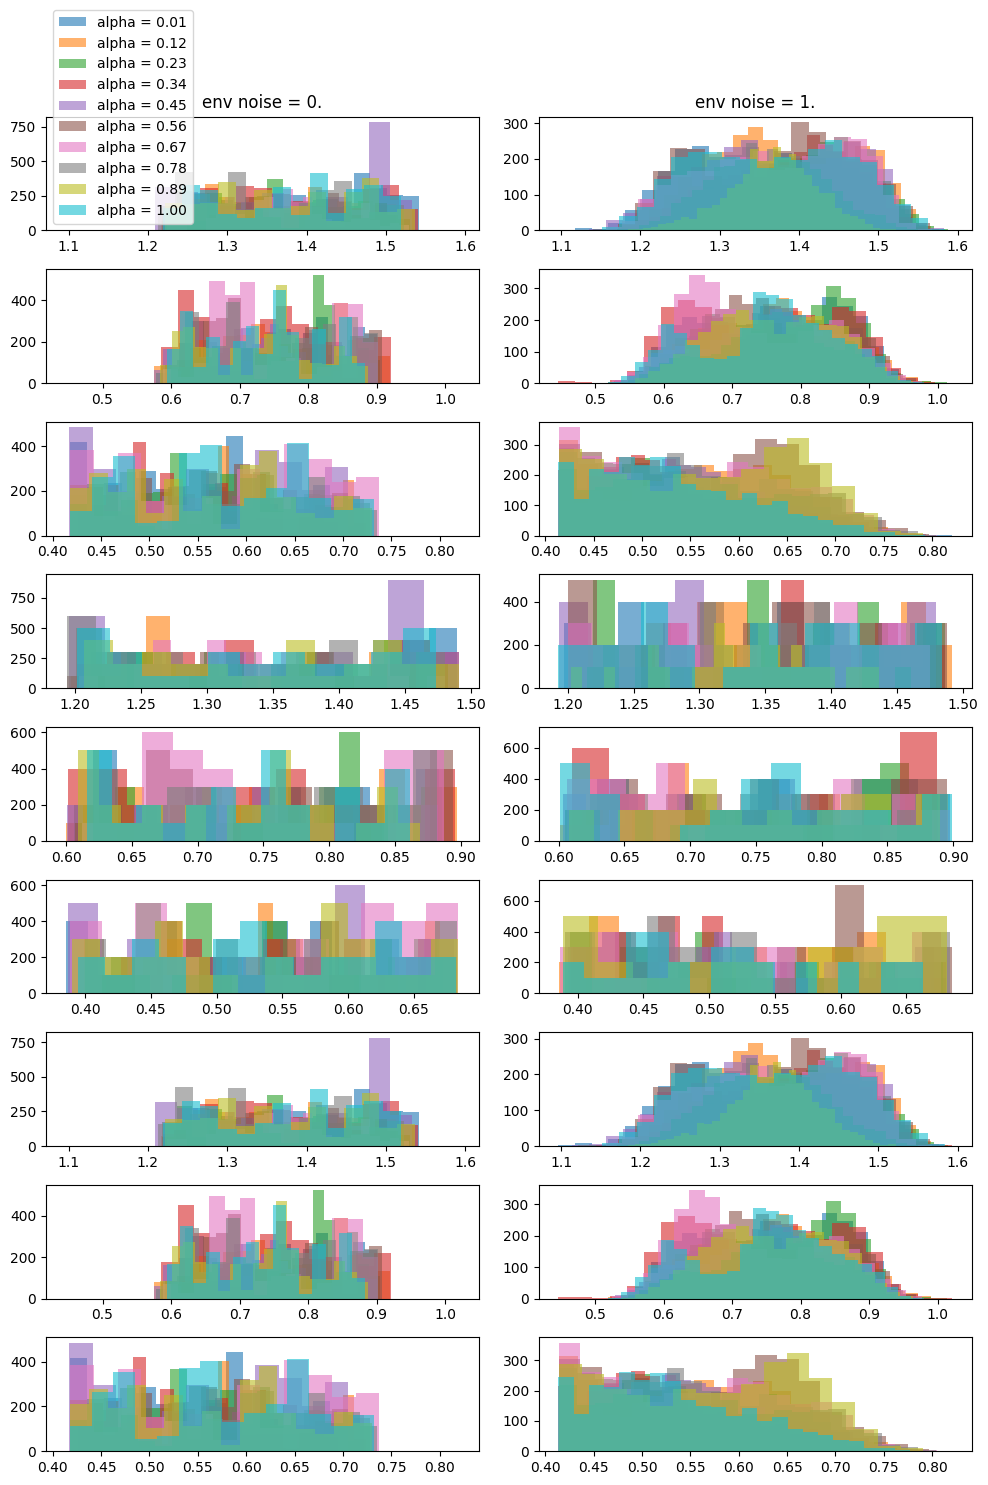

In [37]:
# plot state feature distributions
state_idxs = np.arange(state_dim - 1)
fig, ax = plt.subplots(len(state_idxs), 2, figsize=(10, 15), sharex="row")
for i, s in enumerate(state_idxs):
    for j in range(len(teacher_noise_slopes)):
        ax[i, 0].hist(eval_data_1[0][j]["obs"]["observation"][:, i], bins="fd", alpha=0.6, label="alpha = {:.2f}".format(teacher_alphas[j]))
        ax[i, 1].hist(eval_data_2[0][j]["obs"]["observation"][:, i], bins="fd", alpha=0.6, label="alpha = {:.2f}".format(teacher_alphas[j]))    
ax[0, 0].legend()
ax[0, 0].set_title("env noise = 0.")
ax[0, 1].set_title("env noise = 1.")

plt.tight_layout()
plt.show()